**IMPORT REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

**UPLOAD THE DATASET**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


**LOAD THE DATASET**

In [ ]:
df = pd.read_csv("data.csv")
df_graphs = pd.read_csv("data.csv")
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [ ]:
df

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


In [ ]:
df.size

684024

In [ ]:
df.shape

(62184, 11)

In [ ]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


**Random forest algorithm**

The random forest algorithm can be used to solve regression and classification problems. It operates by constructing a multitude of decision trees and merging them together to obtain a more stable and accurate prediction. Each decision tree forecasts a response for an occurrence and the endmost response is decided through voting. In a regression problem, the final response is the average of all the responses.

**Further steps**

>do feature engineering

>split data into training & test sets

>create and train a model using random forest

In [ ]:
del df['is_holiday']

In [ ]:
df

,number_people,date,timestamp,day_of_week,is_weekend,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,56.71,0,1,3,19


**CO-RELATION**

Text(0.5, 1.0, 'Correlation between different fearures')

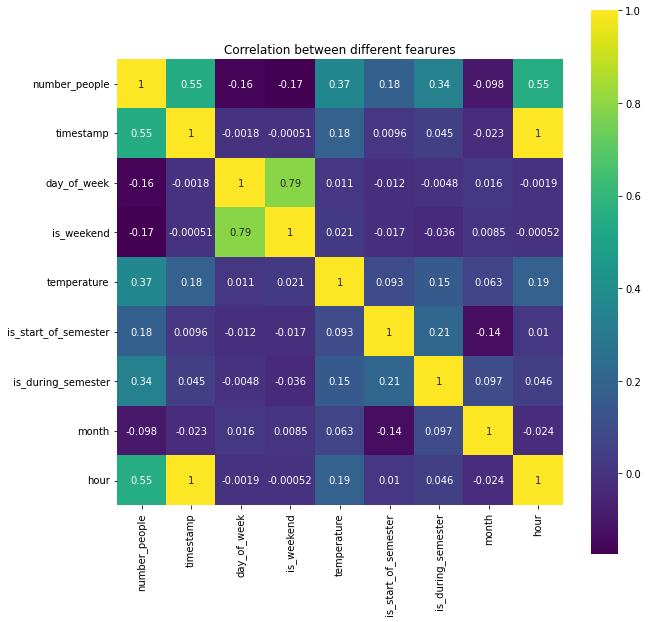

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different fearures')

We can observe that timestamp and hour have 1 as correlation coefficient. Therefore we will delete the column of timestamp in order to keep only the most optimal features.

In [ ]:
df = df.drop("date", axis=1)
del df['timestamp']
columns = ["day_of_week", "month", "hour"]
df = pd.get_dummies(df, columns=columns)
df.head(10)

,number_people,is_weekend,temperature,is_start_of_semester,is_during_semester,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,37,0,71.76,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,45,0,71.76,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,40,0,71.76,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,44,0,71.76,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,45,0,71.76,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,46,0,72.15,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,43,0,72.15,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7,53,0,72.15,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,54,0,72.15,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,43,0,72.15,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


**Extract the training and test data**

In [ ]:
data = df.values
X = data[:, 1:]
y = data[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Here we splitted the dataset into 2 datasets : Training and testing. As it is generally used, we splitted 75% of the data for the training and 25% for the testing.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Here we are using 2 functions provided by the StandardScaler library :

>Fit is used to compute the mean and std to be used for later scaling.

>Transform is used to perform standardization by centering and scaling.

In [ ]:
model = RandomForestRegressor(n_jobs=-1)

**Evaluation & Analysis**

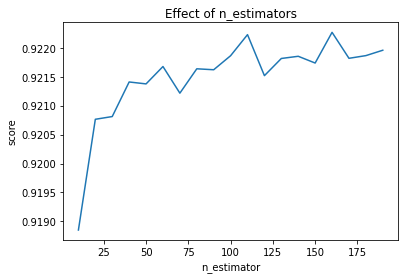

In [ ]:
estimators = np.arange(10, 200, 10)
scores = []

for n in estimators:
    model.set_params(n_estimators=n) # Choose the parameters
    model.fit(X_train, y_train) # Use the training datasets to build the forest of trees
    scores.append(model.score(X_test, y_test)) # Fill the array with predictions
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
scores

[0.9188501759851797,
 0.9207657281285091,
 0.9208129890245925,
 0.9214111614638391,
 0.921377894904134,
 0.9216785435651018,
 0.9212177152664867,
 0.9216391477755518,
 0.9216227173369068,
 0.9218654737180731,
 0.9222300004134463,
 0.9215206126219881,
 0.9218177528306972,
 0.9218556712992397,
 0.9217388544319316,
 0.9222699296820073,
 0.9218206759703842,
 0.9218671661191937,
 0.921960146234283]

In [ ]:
round(max(scores), 4)

0.9223

**Heatmap Week**

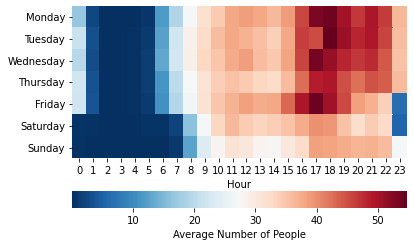

In [ ]:
g = df_graphs[['hour','number_people','day_of_week']]

F = g.groupby(['hour','day_of_week'], as_index = False).number_people.mean().pivot('day_of_week','hour','number_people').fillna(0) #resharp the dataframe with the mean of people number

grid_kws = {"height_ratios": (.9, .05), "hspace": .3}

dow= 'Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split()


ax = sns.heatmap(F, cmap='RdBu_r',cbar_kws={"orientation": "horizontal"})
ax.set_yticklabels(dow, rotation = 0) # axis labels
ax.set_ylabel('')
ax.set_xlabel('Hour')

cbar = ax.collections[0].colorbar
cbar.set_label('Average Number of People')

**Heatmap Year**

In [ ]:
def get_date(series):
    return series.str.slice(8,11)

Text(0.5, 42.0, 'Day of week')

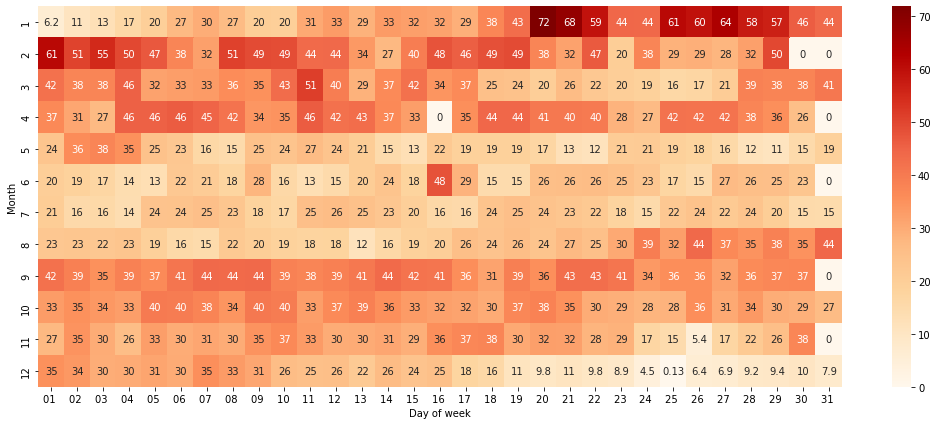

In [ ]:
df_graphs['day_of_month'] = df_graphs[['date']].apply(get_date) #dataframe with only the day of the month from the date
month_date_count_df = pd.pivot_table(df_graphs, columns=['day_of_month'],index=['month'], values='number_people', aggfunc=np.mean)
month_date_count_df.fillna(0, inplace=True)
fig, ax = plt.subplots(figsize=(18,7)) 
heatmap = sns.heatmap(month_date_count_df, annot=True, ax=ax, cmap="OrRd") 
heatmap.set_ylabel('Month')
heatmap.set_xlabel('Day of week')

We can see that at the start of the semester, the number of people at the gym is considerably increasing (end of January and August).

We can also clearly identify that the traffic is getting slower before holidays (probably due to exams) and is even worse during holidays (June to August and December to January).